# FTT model including constraint and learning

In this notebook the cell magic %latexmodelgrab is used. It allows the specification of segments of the model. 

This the model here is used to merge with the Kenya model. 

version 6 includes:
 - better  max production,
 - better min produciton
 - shares can be adjusted exogenous 
 - global production input into price learning  
 
 version 7 includes unnadas changes implemented in eviews 


In [1]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from IPython.core.display import HTML,Markdown,Latex


from modelclass import model
import modeljupytermagic

# some useful stuf
model.widescreen()
pd.set_option('display.max_rows', None, 'display.max_columns', 10, 'display.precision', 4)

## Define the model
The model is defined by **segments**. Each segment is defined in a cell. This simplifies the specification and allows the developer to focus at each segment and its resulting equations.  
And debugging.

As many segments will use the lists of technologies, segments which name starts 
with **list** will be appended to each segment. 

a model is defined with 

%%latexmodelgrab

 - \<name> Name of the model test 
 - segment=\<list*>|<text*>|<*> rest 
 - display 
 - all   
    
Will create:
 - \<name>
 - \<name>__latex_model_instance

### Define technologies. 
Below the technologies are listed. 



In [3]:
%%latexmodelgrab mftt  display segment=list1
\title{FTT Flex in modelflow}
\author{ib}
\maketitle
### Define technologies 


Two lists of technology  are defined. They have the same content, but two lists are nessesary 
when the preferences between two tecknologies has to be compared. 

Also one of the lists $i$ has a sublist called fosile. A sublist has to have the same number of elements as the main 
list. I can be used - among other things - to manage the 
the generations of equations and to do conditional sums: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} 
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$ 

    
$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$

\title{FTT Flex in modelflow}
\author{ib}
\maketitle
### Define technologies 


Two lists of technology  are defined. They have the same content, but two lists are nessesary 
when the preferences between two tecknologies has to be compared. 

Also one of the lists $i$ has a sublist called fosile. A sublist has to have the same number of elements as the main 
list. I can be used - among other things - to manage the 
the generations of equations and to do conditional sums: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} 
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$ 

    
$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$


In [4]:
%%latexmodelgrab mftt  ndisplay segment=text1
Any number of technology can be specified (limited by the avaiable memory)

The time index $_t$ is implicit. 

Any number of technology can be specified (limited by the avaiable memory)

The time index $_t$ is implicit. 


### Preferences

In [5]:
%%latexmodelgrab mftt  display segment=preferences 
### Preferences
Each technology is compared to all other based on the percieved costs and the preferences (choice likelihood) $F^{i,j}$ are calculated.
    
For all technologies $F^{i,j}+F^{j,i} = 1 $

\begin{equation}
\label{eq:preferences}
\underbrace{F^{i,j}}_{Preferences} = \frac{1}{
1+exp(
    \frac{(Cost\_argumented^{i}-Cost\_argumented^{j})}{\sigma^{i,j}} )}
\end{equation}



### Preferences
Each technology is compared to all other based on the percieved costs and the preferences (choice likelihood) $F^{i,j}$ are calculated.
    
For all technologies $F^{i,j}+F^{j,i} = 1 $

\begin{equation}
\label{eq:preferences}
\underbrace{F^{i,j}}_{Preferences} = \frac{1}{
1+exp(
    \frac{(Cost\_argumented^{i}-Cost\_argumented^{j})}{\sigma^{i,j}} )}
\end{equation}



## Creating this Template model

do i  $ do j  $
  frml    <preferences> F__{i}__{j} = ((1)/(1+exp( (((Cost_argumented__{i}-Cost_argumented__{j}))/(sigma__{i}__{j})) ))) $
enddo $ enddo $ 
LIST I =    I  : OIL  COAL  GAS  BIOMASS  SOLAR  WIND  HYDRO  GEOTHERMAL / 
         FOSILE:   1   1  1  0  0  0  0  0 $
LIST J =    J  :  OIL  COAL  GAS  BIOMASS  SOLAR  WIND  HYDRO  GEOTHERMAL $



## And this Business Logic Language  model


FRML <PREFERENCES> F__OIL__OIL = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__OIL))/(SIGMA__OIL__OIL)) ))) $
FRML <PREFERENCES> F__OIL__COAL = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__COAL))/(SIGMA__OIL__COAL)) ))) $
FRML <PREFERENCES> F__OIL__GAS = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__GAS))/(SIGMA__OIL__GAS)) ))) $
FRML <PREFERENCES> F__OIL__BIOMASS = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__BIOMASS))/(SIGMA__OIL__BIOMASS)) ))) $
FRML <PREFERENCES> F__OIL__SOLAR = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__SOLAR))/(SIGMA__OIL__SOLAR)) ))) $
FRML <PREFERENCES> F__OIL__WIND = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__WIND))/(SIGMA__OIL__WIND)) ))) $
FRML <PREFERENCES> F__OIL__HYDRO = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__HYDRO))/(SIGMA__OIL__HYDRO)) ))) $
FRML <PREFERENCES> F__OIL__GEOTHERMAL = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__GEOTHERMAL))/(SIGMA__OIL__GEOTHERMAL)) ))) $



F

### Difusion

In [6]:
%%latexmodelgrab mftt  ndisplay segment=difusion 
### Difusion
\begin{equation}
\label{eq:DIFUSION}
 A^{i,j} = \frac{K}{\underbrace{Lead^{i}}_{birthrate} \cdot \underbrace{Tau^{j}}_{Deathrate}}
\end{equation}



### Difusion
\begin{equation}
\label{eq:DIFUSION}
 A^{i,j} = \frac{K}{\underbrace{Lead^{i}}_{birthrate} \cdot \underbrace{Tau^{j}}_{Deathrate}}
\end{equation}



### Share dynamic 

In [7]:
%%latexmodelgrab mftt  ndisplay segment=Share 
### Share dynamic 
Here the shares are determined. Remember that if adjustment is used, it should be balances, that 
is the sum over all technologies should be 0.0 

\begin{equation}
\label{eq:SHARES2}
\Delta Share^{i} = \sum_{j}(Share^{i} \times Share^{j} \times
                            (F^{i,j}\times A^{i,j} - F^{j,i}\times A^{j,i}))
                        + Share\_adjust^{i}
\end{equation}


### Share dynamic 
Here the shares are determined. Remember that if adjustment is used, it should be balances, that 
is the sum over all technologies should be 0.0 

\begin{equation}
\label{eq:SHARES2}
\Delta Share^{i} = \sum_{j}(Share^{i} \times Share^{j} \times
                            (F^{i,j}\times A^{i,j} - F^{j,i}\times A^{j,i}))
                        + Share\_adjust^{i}
\end{equation}


### Sigma

In [8]:
%%latexmodelgrab mftt  ndisplay segment=sigma 
### Sigma 
The percieved width in the choice function

\begin{equation}
\label{eq:ident,sigma}
\Sigma^{i,j} = \sqrt{(\Sigma^{i})^{(2)} \cdot (\Sigma^{j})^{(2)}}
\end{equation}

\begin{equation}
\label{eq:sigma_cost}
Sigma^{i} = Sigma\_Capital\_Cost^{i} + Sigma\_Capital\_Subsidy\_Cost^{i} + Sigma\_OM\_Cost^{i}
+Sigma\_Fuel\_Cost^{i} + Sigma\_Fuel\_Tax\_Level^{i}
+Sigma\_Carbon\_tax^{i}
\end{equation}



### Sigma 
The percieved width in the choice function

\begin{equation}
\label{eq:ident,sigma}
\Sigma^{i,j} = \sqrt{(\Sigma^{i})^{(2)} \cdot (\Sigma^{j})^{(2)}}
\end{equation}

\begin{equation}
\label{eq:sigma_cost}
Sigma^{i} = Sigma\_Capital\_Cost^{i} + Sigma\_Capital\_Subsidy\_Cost^{i} + Sigma\_OM\_Cost^{i}
+Sigma\_Fuel\_Cost^{i} + Sigma\_Fuel\_Tax\_Level^{i}
+Sigma\_Carbon\_tax^{i}
\end{equation}



### CO^2 emission 

In [9]:
%%latexmodelgrab mftt  ndisplay segment=co2emission 
### CO2 emission 

\begin{equation}
\label{eq:co2emission}
CO2\_emission^{i} = Production^{i}  \cdot CO2\_Coeff^{i}
\end{equation}

\begin{equation}
\label{eq:total_co2emission}
CO2\_emission\_total = \sum_{i}(CO2\_emission^{i})
\end{equation}

### CO2 emission 

\begin{equation}
\label{eq:co2emission}
CO2\_emission^{i} = Production^{i}  \cdot CO2\_Coeff^{i}
\end{equation}

\begin{equation}
\label{eq:total_co2emission}
CO2\_emission\_total = \sum_{i}(CO2\_emission^{i})
\end{equation}


### Production  local 

In [ ]:
%%latexmodelgrab mftt  ndisplay segment=production 
### Production  local 
The production from each sector can be calculated. 

\begin{equation}
\label{eq:production}
Production^{i} = Share^{i} \cdot Demand\_total 
\end{equation}


### Capital Cost  

In [10]:
%%latexmodelgrab mftt  ndisplay segment=capital_cost
### Capital Cost

The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.

\begin{equation}
\label{eq:learning}
learning\_impact^{i} =  (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}


\begin{equation}
\label{eq:capital_cost}
Capital\_Cost^{i} = Capital\_Cost^{i}_{t-1} \cdot learning\_impact^{i} + Capital\_Cost\_add^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_capital_cost}
Sigma\_Capital\_Cost^{i} = Sigma\_Capital\_Cost^{i}_{t-1} \cdot learning\_impact^{i}
\end{equation}

\begin{equation}
\label{eq:subsidy_capital_cost2}
Capital\_Subsidy\_Cost^{i} = Capital\_Cost^{i} \cdot (-Capital\_Subsidy^{i})   
\end{equation}


\begin{equation}
\label{eq:sigma_capital_subsidy_cost}
Sigma\_Capital\_Subsidy\_Cost^{i} = Sigma\_Capital\_Subsidy\_Cost^{i}_{t-1} \cdot 
   learning\_impact^{i}
\end{equation}


\begin{equation}
\label{eq:total_Subsidy}
Subsidy\_Total = \sum_{i}(Capital\_Subsidy\_Cost^{i} )
\end{equation}




### Capital Cost

The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.

\begin{equation}
\label{eq:learning}
learning\_impact^{i} =  (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}


\begin{equation}
\label{eq:capital_cost}
Capital\_Cost^{i} = Capital\_Cost^{i}_{t-1} \cdot learning\_impact^{i} + Capital\_Cost\_add^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_capital_cost}
Sigma\_Capital\_Cost^{i} = Sigma\_Capital\_Cost^{i}_{t-1} \cdot learning\_impact^{i}
\end{equation}

\begin{equation}
\label{eq:subsidy_capital_cost2}
Capital\_Subsidy\_Cost^{i} = Capital\_Cost^{i} \cdot (-Capital\_Subsidy^{i})   
\end{equation}


\begin{equation}
\label{eq:sigma_capital_subsidy_cost}
Sigma\_Capital\_Subsidy\_Cost^{i} = Sigma\_Capital\_Subsidy\_Cost^{i}_{t-1} \cdot 
   learning\_impact^{i}
\end{equation}


\begin{equation}
\label{eq:total_Subsidy}
Subsidy\_Total = \sum_{i}(Capital\_Subsidy\_Cost^{i} )
\end{equation}




### Operating and maintenance  Cost  

In [11]:
%%latexmodelgrab mftt  ndisplay segment=OM_cost
### Operating and maintenance  Cost  and dispersion

The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:om_cost}
OM\_Cost^{i} = OM\_Cost^{i}_{t-1} \cdot 
   learning\_impact^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_OM_cost}
Sigma\_OM\_Cost^{i} = Sigma\_OM\_Cost^{i}_{t-1} \cdot 
   learning\_impact^{i}
\end{equation}



### Operating and maintenance  Cost  and dispersion

The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:om_cost}
OM\_Cost^{i} = OM\_Cost^{i}_{t-1} \cdot 
   learning\_impact^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_OM_cost}
Sigma\_OM\_Cost^{i} = Sigma\_OM\_Cost^{i}_{t-1} \cdot 
   learning\_impact^{i}
\end{equation}



### Fuel  Cost  

In [12]:
%%latexmodelgrab mftt  ndisplay segment=Fuel_cost
### Fuel  Cost  and dispersion

The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:fuel_cost}
\forall [i=fosile]\:\:  Fuel\_Cost^{i} = Fuel\_Cost^{i}_{t-1} \cdot \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}

\begin{equation}
\label{eq:sigma_fuel_cost}
\forall [i=fosile]\:\:  Sigma\_Fuel\_Cost^{i} = Sigma\_Fuel\_Cost^{i}_{t-1} \cdot 
  \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}


\begin{equation}
\label{eq:fuel_tax}
Fuel\_Tax\_Level^{i} = Fuel\_Cost^{i}_{t-1} \cdot Fuel\_Tax\_rate^{i}
\end{equation}


\begin{equation}
\label{eq:sigma_fuel_tax}
Sigma\_Fuel\_Tax\_Level^{i} = Sigma\_Fuel\_Cost^{i} \cdot Fuel\_Tax\_rate^{i}
\end{equation}




### Fuel  Cost  and dispersion

The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:fuel_cost}
\forall [i=fosile]\:\:  Fuel\_Cost^{i} = Fuel\_Cost^{i}_{t-1} \cdot \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}

\begin{equation}
\label{eq:sigma_fuel_cost}
\forall [i=fosile]\:\:  Sigma\_Fuel\_Cost^{i} = Sigma\_Fuel\_Cost^{i}_{t-1} \cdot 
  \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}


\begin{equation}
\label{eq:fuel_tax}
Fuel\_Tax\_Level^{i} = Fuel\_Cost^{i}_{t-1} \cdot Fuel\_Tax\_rate^{i}
\end{equation}


\begin{equation}
\label{eq:sigma_fuel_tax}
Sigma\_Fuel\_Tax\_Level^{i} = Sigma\_Fuel\_Cost^{i} \cdot Fuel\_Tax\_rate^{i}
\end{equation}




### Carbon Tax

In [13]:
%%latexmodelgrab mftt ndisplay segment=Cabon_tax
### Carbon Tax



\begin{equation}
\label{eq:carbon_tax}
Carbon\_tax^{i} = Carbon\_tax\_Rate  \cdot CO2\_Coeff^{i}
\cdot 0.001 \cdot Fuel\_coverage^{i}
\end{equation}

\begin{equation}
\label{eq:total_carbon_tax}
Carbon\_tax\_Total = \sum_{i}(Carbon\_tax^{i})
\end{equation}



### Carbon Tax



\begin{equation}
\label{eq:carbon_tax}
Carbon\_tax^{i} = Carbon\_tax\_Rate  \cdot CO2\_Coeff^{i}
\cdot 0.001 \cdot Fuel\_coverage^{i}
\end{equation}

\begin{equation}
\label{eq:total_carbon_tax}
Carbon\_tax\_Total = \sum_{i}(Carbon\_tax^{i})
\end{equation}



### Total cost 

In [14]:
%%latexmodelgrab mftt  ndisplay segment=total_cost
### Total cost

\begin{equation}
\label{eq:cost}
Cost^{i} = Capital\_Cost^{i} + Capital\_Subsidy\_Cost^{i} + OM\_Cost^{i}
+Fuel\_Cost^{i} + Fuel\_Tax\_Level^{i}
+Carbon\_tax^{i}
\end{equation}



### Total cost

\begin{equation}
\label{eq:cost}
Cost^{i} = Capital\_Cost^{i} + Capital\_Subsidy\_Cost^{i} + OM\_Cost^{i}
+Fuel\_Cost^{i} + Fuel\_Tax\_Level^{i}
+Carbon\_tax^{i}
\end{equation}



### Imposing min and max shares  

In [15]:
%%latexmodelgrab mftt  ndisplay segment=min_max 
### Imposing min and max shares  

Sometime there can be constarint (min and/or max) on the shares (or the demand). To enforce constraints
 - a penalty is added to the percieved cost if the share violate the max constrain.  
 - a deduction is subtracted from the cost if the shares violates the min constrain. .  



One way to calculate the penalty would look like this:  
    
\begin{equation}
\label{eqNO:maxout}
penalty\_max\_l^{i} = penalty\_multiplier^{i}* Cost^{i}* (Production^{i} > Production\_max^{i}) 
\end{equation}

However in order to get more numerical stability an equation which smooth out the logical expression: $Production^{i} > Production\_max^{i}$  is used: 

\begin{equation}
\label{eq:maxoutlogit}
penalty\_max^{i} = penalty\_multiplier^{i} * Cost^{i} * logit^{-1}(penalty\_sensitivity^{i}*(Production^{i} - Production\_max^{i})) 
\end{equation}



Also for the deduction we use a more smooth barriere: 

\begin{equation}
\label{eq:minoutlogit}
deduction\_min^{i} = Cost^{i}* deduction\_multiplier^{i} * logit^{-1}(deduction\_sensitivity^{i}*(Production\_min^{i}-Production^{i})  )
\end{equation}



These penalties and decustions are used to calculate the argumented costs, which  enters the equation for prefereences ($F^{i,j}$)



### Imposing min and max shares  

Sometime there can be constarint (min and/or max) on the shares (or the demand). To enforce constraints
 - a penalty is added to the percieved cost if the share violate the max constrain.  
 - a deduction is subtracted from the cost if the shares violates the min constrain. .  



One way to calculate the penalty would look like this:  
    
\begin{equation}
\label{eqNO:maxout}
penalty\_max\_l^{i} = penalty\_multiplier^{i}* Cost^{i}* (Production^{i} > Production\_max^{i}) 
\end{equation}

However in order to get more numerical stability an equation which smooth out the logical expression: $Production^{i} > Production\_max^{i}$  is used: 

\begin{equation}
\label{eq:maxoutlogit}
penalty\_max^{i} = penalty\_multiplier^{i} * Cost^{i} * logit^{-1}(penalty\_sensitivity^{i}*(Production^{i} - Production\_max^{i})) 
\end{equation}



Also for the deduction we use a more smooth barriere: 

\begin{equation}
\label{eq:minoutlogit}
deduction\_min^{i} = Cost^{i}* deduction\_multiplier^{i} * logit^{-1}(deduction\_sensitivity^{i}*(Production\_min^{i}-Production^{i})  )
\end{equation}



These penalties and decustions are used to calculate the argumented costs, which  enters the equation for prefereences ($F^{i,j}$)



### Argumented cost 

In [16]:
%%latexmodelgrab mftt  ndisplay segment=Argumented_cost 
### Argumented cost 

In order to impose the constraints a new cost measure is created. $Cost\_argumented^{i}$ is used as input in the 
calculations of preferences 

\begin{equation}
\label{eq:Z_costbarrier}
Cost\_argumented^{i} = Cost^{i} +  penalty\_max^{i} -  deduction\_min^{i}
\end{equation}

### Argumented cost 

In order to impose the constraints a new cost measure is created. $Cost\_argumented^{i}$ is used as input in the 
calculations of preferences 

\begin{equation}
\label{eq:Z_costbarrier}
Cost\_argumented^{i} = Cost^{i} +  penalty\_max^{i} -  deduction\_min^{i}
\end{equation}


### Average cost 

In [17]:
%%latexmodelgrab mftt ndisplay segment=average_cost 
### Average cost

To feed into the main model the average cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 

\begin{equation}
\label{eq:Average_cost}
Cost\_average = \sum_{i}(Cost^{i} \cdot Share^{i} ) 
\end{equation}


### Average cost

To feed into the main model the average cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 

\begin{equation}
\label{eq:Average_cost}
Cost\_average = \sum_{i}(Cost^{i} \cdot Share^{i} ) 
\end{equation}


### Max cost 

In [18]:
%%latexmodelgrab mftt ndisplay segment=max_cost 
### Max cost 

To feed into the main model the max cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 


\begin{equation}
\label{eq:max_cost}
max\_total  = \max_{i}(Share^{i}) 
\end{equation}

### Max cost 

To feed into the main model the max cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 


\begin{equation}
\label{eq:max_cost}
max\_total  = \max_{i}(Share^{i}) 
\end{equation}


### Check, that the shares add up to one. 

In [19]:
%%latexmodelgrab mftt ndisplay segment=check 
### Check, that the shares add up to one.
\begin{equation}
\label{eq:check_shares}
Share\_total  = \sum_{i}(Share^{i})
\end{equation}

### Check, that the shares add up to one.
\begin{equation}
\label{eq:check_shares}
Share\_total  = \sum_{i}(Share^{i})
\end{equation}


### Create the share for fosile fuels 

In [20]:
%%latexmodelgrab mftt  ndisplay segment=fosile 
### Create the share for fosile fuels 

This shows how to make conditional summations 
\begin{equation}
\label{eq:share_fosile}
Share\_\_fosile  = \sum_{i=fosile}(Share^{i})
\end{equation}

### Create the share for fosile fuels 

This shows how to make conditional summations 
\begin{equation}
\label{eq:share_fosile}
Share\_\_fosile  = \sum_{i=fosile}(Share^{i})
\end{equation}


### Create equations just for fosile fuels

In [21]:
%%latexmodelgrab mftt  ndisplay segment=fosilesharetest 
### Create equations just for fosile fuels
This ilustrates how to make equations conditional on sublists 


\begin{align}
\label{eq:SHARES3}
\forall [i=fosile]\:\:  fosileshare^{i} &= Share^{i} 
\end{align}



### Create equations just for fosile fuels
This ilustrates how to make equations conditional on sublists 


\begin{align}
\label{eq:SHARES3}
\forall [i=fosile]\:\:  fosileshare^{i} &= Share^{i} 
\end{align}



## Combine all the segments

In [22]:
%%latexmodelgrab mftt ndisplay render=False
# Combined model

In [23]:
mftt.model_description = ''' FTT-Flex for Proof of Concept
Version 7
'''

In [67]:
display(Markdown(mftt.equations_latex))


\documentclass{article}

% Add necessary packages


\usepackage{amsmath} % For mathematical equations


\begin{document} 



\title{FTT Flex in modelflow}
\author{ib}
\maketitle
\section{Define technologies}

Two lists of technology  are defined. They have the same content, but two lists are nessesary 
when the preferences between two tecknologies has to be compared. 

Also one of the lists $i$ has a sublist called fosile. A sublist has to have the same number of elements as the main 
list. I can be used - among other things - to manage the 
the generations of equations and to do conditional sums: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} 
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$ 

    
$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$

Any number of technology can be specified (limited by the avaiable memory)

The time index $_t$ is implicit. 

\section{Preferences}

Each technology is compared to all other based on the percieved costs and the preferences (choice likelihood) $F^{i,j}$ are calculated.
    
For all technologies $F^{i,j}+F^{j,i} = 1 $

\begin{equation}
\label{eq:preferences}
\underbrace{F^{i,j}}_{Preferences} = \frac{1}{
1+exp(
    \frac{(Cost\_argumented^{i}-Cost\_argumented^{j})}{\sigma^{i,j}} )}
\end{equation}


\section{Difusion}

\begin{equation}
\label{eq:DIFUSION}
 A^{i,j} = \frac{K}{\underbrace{Lead^{i}}_{birthrate} \cdot \underbrace{Tau^{j}}_{Deathrate}}
\end{equation}


\section{Share dynamic}

Here the shares are determined. Remember that if adjustment is used, it should be balances, that 
is the sum over all technologies should be 0.0 

\begin{equation}
\label{eq:SHARES2}
\Delta Share^{i} = \sum_{j}(Share^{i} \times Share^{j} \times
                            (F^{i,j}\times A^{i,j} - F^{j,i}\times A^{j,i}))
                        + Share\_adjust^{i}
\end{equation}

\section{Sigma}

The percieved width in the choice function

\begin{equation}
\label{eq:ident,sigma}
\Sigma^{i,j} = \sqrt{(\Sigma^{i})^{(2)} \cdot (\Sigma^{j})^{(2)}}
\end{equation}

\begin{equation}
\label{eq:sigma_cost}
Sigma^{i} = Sigma\_Capital\_Cost^{i} + Sigma\_Capital\_Subsidy\_Cost^{i} + Sigma\_OM\_Cost^{i}
+Sigma\_Fuel\_Cost^{i} + Sigma\_Fuel\_Tax\_Level^{i}
+Sigma\_Carbon\_tax^{i}
\end{equation}


\section{CO2 emission}

\begin{equation}
\label{eq:co2emission}
CO2\_emission^{i} = Production^{i}  \cdot CO2\_Coeff^{i}
\end{equation}

\begin{equation}
\label{eq:total_co2emission}
CO2\_emission\_total = \sum_{i}(CO2\_emission^{i})
\end{equation}

\section{Capital Cost}

The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.

\begin{equation}
\label{eq:learning}
learning\_impact^{i} =  (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}


\begin{equation}
\label{eq:capital_cost}
Capital\_Cost^{i} = Capital\_Cost^{i}_{t-1} \cdot learning\_impact^{i} + Capital\_Cost\_add^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_capital_cost}
Sigma\_Capital\_Cost^{i} = Sigma\_Capital\_Cost^{i}_{t-1} \cdot learning\_impact^{i}
\end{equation}

\begin{equation}
\label{eq:subsidy_capital_cost2}
Capital\_Subsidy\_Cost^{i} = Capital\_Cost^{i} \cdot (-Capital\_Subsidy^{i})   
\end{equation}


\begin{equation}
\label{eq:sigma_capital_subsidy_cost}
Sigma\_Capital\_Subsidy\_Cost^{i} = Sigma\_Capital\_Subsidy\_Cost^{i}_{t-1} \cdot 
   learning\_impact^{i}
\end{equation}


\begin{equation}
\label{eq:total_Subsidy}
Subsidy\_Total = \sum_{i}(Capital\_Subsidy\_Cost^{i} )
\end{equation}



\section{Operating and maintenance  Cost  and dispersion}

The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:om_cost}
OM\_Cost^{i} = OM\_Cost^{i}_{t-1} \cdot 
   learning\_impact^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_OM_cost}
Sigma\_OM\_Cost^{i} = Sigma\_OM\_Cost^{i}_{t-1} \cdot 
   learning\_impact^{i}
\end{equation}


\section{Fuel  Cost  and dispersion}

The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:fuel_cost}
\forall [i=fosile]\:\:  Fuel\_Cost^{i} = Fuel\_Cost^{i}_{t-1} \cdot \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}

\begin{equation}
\label{eq:sigma_fuel_cost}
\forall [i=fosile]\:\:  Sigma\_Fuel\_Cost^{i} = Sigma\_Fuel\_Cost^{i}_{t-1} \cdot 
  \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}


\begin{equation}
\label{eq:fuel_tax}
Fuel\_Tax\_Level^{i} = Fuel\_Cost^{i}_{t-1} \cdot Fuel\_Tax\_rate^{i}
\end{equation}


\begin{equation}
\label{eq:sigma_fuel_tax}
Sigma\_Fuel\_Tax\_Level^{i} = Sigma\_Fuel\_Cost^{i} \cdot Fuel\_Tax\_rate^{i}
\end{equation}



\section{Carbon Tax}

\begin{equation}
\label{eq:carbon_tax}
Carbon\_tax^{i} = Carbon\_tax\_Rate  \cdot CO2\_Coeff^{i}
\cdot 0.001 \cdot Fuel\_coverage^{i}
\end{equation}

\begin{equation}
\label{eq:total_carbon_tax}
Carbon\_tax\_Total = \sum_{i}(Carbon\_tax^{i})
\end{equation}


\section{Total cost}

\begin{equation}
\label{eq:cost}
Cost^{i} = Capital\_Cost^{i} + Capital\_Subsidy\_Cost^{i} + OM\_Cost^{i}
+Fuel\_Cost^{i} + Fuel\_Tax\_Level^{i}
+Carbon\_tax^{i}
\end{equation}


\section{Imposing min and max shares}

Sometime there can be constarint (min and/or max) on the shares (or the demand). To enforce constraints
 - a penalty is added to the percieved cost if the share violate the max constrain.  
 - a deduction is subtracted from the cost if the shares violates the min constrain. .  



One way to calculate the penalty would look like this:  
    
\begin{equation}
\label{eqNO:maxout}
penalty\_max\_l^{i} = penalty\_multiplier^{i}* Cost^{i}* (Production^{i} > Production\_max^{i}) 
\end{equation}

However in order to get more numerical stability an equation which smooth out the logical expression: $Production^{i} > Production\_max^{i}$  is used: 

\begin{equation}
\label{eq:maxoutlogit}
penalty\_max^{i} = penalty\_multiplier^{i} * Cost^{i} * logit^{-1}(penalty\_sensitivity^{i}*(Production^{i} - Production\_max^{i})) 
\end{equation}



Also for the deduction we use a more smooth barriere: 

\begin{equation}
\label{eq:minoutlogit}
deduction\_min^{i} = Cost^{i}* deduction\_multiplier^{i} * logit^{-1}(deduction\_sensitivity^{i}*(Production\_min^{i}-Production^{i})  )
\end{equation}



These penalties and decustions are used to calculate the argumented costs, which  enters the equation for prefereences ($F^{i,j}$)


\section{Argumented cost}

In order to impose the constraints a new cost measure is created. $Cost\_argumented^{i}$ is used as input in the 
calculations of preferences 

\begin{equation}
\label{eq:Z_costbarrier}
Cost\_argumented^{i} = Cost^{i} +  penalty\_max^{i} -  deduction\_min^{i}
\end{equation}

\section{Average cost}

To feed into the main model the average cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 

\begin{equation}
\label{eq:Average_cost}
Cost\_average = \sum_{i}(Cost^{i} \cdot Share^{i} ) 
\end{equation}

\section{Max cost}

To feed into the main model the max cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 


\begin{equation}
\label{eq:max_cost}
max\_total  = \max_{i}(Share^{i}) 
\end{equation}

\section{Check, that the shares add up to one.}

\begin{equation}
\label{eq:check_shares}
Share\_total  = \sum_{i}(Share^{i})
\end{equation}

\section{Create the share for fosile fuels}

This shows how to make conditional summations 
\begin{equation}
\label{eq:share_fosile}
Share\_\_fosile  = \sum_{i=fosile}(Share^{i})
\end{equation}

\section{Create equations just for fosile fuels}

This ilustrates how to make equations conditional on sublists 


\begin{align}
\label{eq:SHARES3}
\forall [i=fosile]\:\:  fosileshare^{i} &= Share^{i} 
\end{align}




\end{document}

## Save the latex version

In [25]:
with open('FTT_Flex.tex','wt') as f: 
    f.write(mftt.equations_latex)
!pandoc -s FTT_FLEX.tex -o FTT_FLEX.docx   

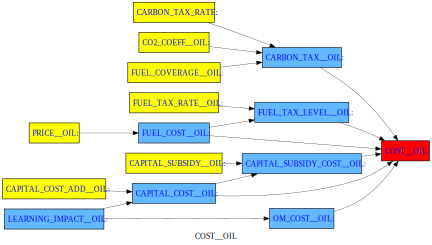

In [26]:
mftt.COST__OIL.draw(down=0,up=2)

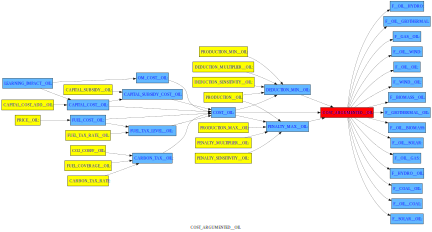

In [27]:
mftt.COST_ARGUMENTED__OIL.draw(down=1,up=3)

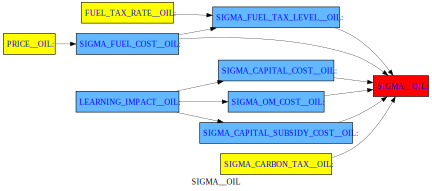

In [28]:
mftt.SIGMA__OIL.draw(down=0,up=2)

In [29]:
# mftt.drawmodel(svg=1,browser=0)

In [30]:
2+2

4

## All phases of the combined model can be displayed:

In [31]:
if 1: 
    mftt_latex_model_instance.show


\documentclass{article}

% Add necessary packages


\usepackage{amsmath} % For mathematical equations


\begin{document} 



\title{FTT Flex in modelflow}
\author{ib}
\maketitle
\section{Define technologies}

Two lists of technology  are defined. They have the same content, but two lists are nessesary 
when the preferences between two tecknologies has to be compared. 

Also one of the lists $i$ has a sublist called fosile. A sublist has to have the same number of elements as the main 
list. I can be used - among other things - to manage the 
the generations of equations and to do conditional sums: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} 
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$ 

    
$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$

Any number of technology can be specified (limited by the avaiable memory)

The time index $_t$ is implicit. 

\section{Preferences}

Each technology is compared to all other based on the percieved costs and the preferences (choice likelihood) $F^{i,j}$ are calculated.
    
For all technologies $F^{i,j}+F^{j,i} = 1 $

\begin{equation}
\label{eq:preferences}
\underbrace{F^{i,j}}_{Preferences} = \frac{1}{
1+exp(
    \frac{(Cost\_argumented^{i}-Cost\_argumented^{j})}{\sigma^{i,j}} )}
\end{equation}


\section{Difusion}

\begin{equation}
\label{eq:DIFUSION}
 A^{i,j} = \frac{K}{\underbrace{Lead^{i}}_{birthrate} \cdot \underbrace{Tau^{j}}_{Deathrate}}
\end{equation}


\section{Share dynamic}

Here the shares are determined. Remember that if adjustment is used, it should be balances, that 
is the sum over all technologies should be 0.0 

\begin{equation}
\label{eq:SHARES2}
\Delta Share^{i} = \sum_{j}(Share^{i} \times Share^{j} \times
                            (F^{i,j}\times A^{i,j} - F^{j,i}\times A^{j,i}))
                        + Share\_adjust^{i}
\end{equation}

\section{Sigma}

The percieved width in the choice function

\begin{equation}
\label{eq:ident,sigma}
\Sigma^{i,j} = \sqrt{(\Sigma^{i})^{(2)} \cdot (\Sigma^{j})^{(2)}}
\end{equation}

\begin{equation}
\label{eq:sigma_cost}
Sigma^{i} = Sigma\_Capital\_Cost^{i} + Sigma\_Capital\_Subsidy\_Cost^{i} + Sigma\_OM\_Cost^{i}
+Sigma\_Fuel\_Cost^{i} + Sigma\_Fuel\_Tax\_Level^{i}
+Sigma\_Carbon\_tax^{i}
\end{equation}


\section{CO2 emission}

\begin{equation}
\label{eq:co2emission}
CO2\_emission^{i} = Production^{i}  \cdot CO2\_Coeff^{i}
\end{equation}

\begin{equation}
\label{eq:total_co2emission}
CO2\_emission\_total = \sum_{i}(CO2\_emission^{i})
\end{equation}

\section{Capital Cost}

The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.

\begin{equation}
\label{eq:learning}
learning\_impact^{i} =  (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}


\begin{equation}
\label{eq:capital_cost}
Capital\_Cost^{i} = Capital\_Cost^{i}_{t-1} \cdot learning\_impact^{i} + Capital\_Cost\_add^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_capital_cost}
Sigma\_Capital\_Cost^{i} = Sigma\_Capital\_Cost^{i}_{t-1} \cdot learning\_impact^{i}
\end{equation}

\begin{equation}
\label{eq:subsidy_capital_cost2}
Capital\_Subsidy\_Cost^{i} = Capital\_Cost^{i} \cdot (-Capital\_Subsidy^{i})   
\end{equation}


\begin{equation}
\label{eq:sigma_capital_subsidy_cost}
Sigma\_Capital\_Subsidy\_Cost^{i} = Sigma\_Capital\_Subsidy\_Cost^{i}_{t-1} \cdot 
   learning\_impact^{i}
\end{equation}


\begin{equation}
\label{eq:total_Subsidy}
Subsidy\_Total = \sum_{i}(Capital\_Subsidy\_Cost^{i} )
\end{equation}



\section{Operating and maintenance  Cost  and dispersion}

The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:om_cost}
OM\_Cost^{i} = OM\_Cost^{i}_{t-1} \cdot 
   learning\_impact^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_OM_cost}
Sigma\_OM\_Cost^{i} = Sigma\_OM\_Cost^{i}_{t-1} \cdot 
   learning\_impact^{i}
\end{equation}


\section{Fuel  Cost  and dispersion}

The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:fuel_cost}
\forall [i=fosile]\:\:  Fuel\_Cost^{i} = Fuel\_Cost^{i}_{t-1} \cdot \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}

\begin{equation}
\label{eq:sigma_fuel_cost}
\forall [i=fosile]\:\:  Sigma\_Fuel\_Cost^{i} = Sigma\_Fuel\_Cost^{i}_{t-1} \cdot 
  \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}


\begin{equation}
\label{eq:fuel_tax}
Fuel\_Tax\_Level^{i} = Fuel\_Cost^{i}_{t-1} \cdot Fuel\_Tax\_rate^{i}
\end{equation}


\begin{equation}
\label{eq:sigma_fuel_tax}
Sigma\_Fuel\_Tax\_Level^{i} = Sigma\_Fuel\_Cost^{i} \cdot Fuel\_Tax\_rate^{i}
\end{equation}



\section{Carbon Tax}

\begin{equation}
\label{eq:carbon_tax}
Carbon\_tax^{i} = Carbon\_tax\_Rate  \cdot CO2\_Coeff^{i}
\cdot 0.001 \cdot Fuel\_coverage^{i}
\end{equation}

\begin{equation}
\label{eq:total_carbon_tax}
Carbon\_tax\_Total = \sum_{i}(Carbon\_tax^{i})
\end{equation}


\section{Total cost}

\begin{equation}
\label{eq:cost}
Cost^{i} = Capital\_Cost^{i} + Capital\_Subsidy\_Cost^{i} + OM\_Cost^{i}
+Fuel\_Cost^{i} + Fuel\_Tax\_Level^{i}
+Carbon\_tax^{i}
\end{equation}


\section{Imposing min and max shares}

Sometime there can be constarint (min and/or max) on the shares (or the demand). To enforce constraints
 - a penalty is added to the percieved cost if the share violate the max constrain.  
 - a deduction is subtracted from the cost if the shares violates the min constrain. .  



One way to calculate the penalty would look like this:  
    
\begin{equation}
\label{eqNO:maxout}
penalty\_max\_l^{i} = penalty\_multiplier^{i}* Cost^{i}* (Production^{i} > Production\_max^{i}) 
\end{equation}

However in order to get more numerical stability an equation which smooth out the logical expression: $Production^{i} > Production\_max^{i}$  is used: 

\begin{equation}
\label{eq:maxoutlogit}
penalty\_max^{i} = penalty\_multiplier^{i} * Cost^{i} * logit^{-1}(penalty\_sensitivity^{i}*(Production^{i} - Production\_max^{i})) 
\end{equation}



Also for the deduction we use a more smooth barriere: 

\begin{equation}
\label{eq:minoutlogit}
deduction\_min^{i} = Cost^{i}* deduction\_multiplier^{i} * logit^{-1}(deduction\_sensitivity^{i}*(Production\_min^{i}-Production^{i})  )
\end{equation}



These penalties and decustions are used to calculate the argumented costs, which  enters the equation for prefereences ($F^{i,j}$)


\section{Argumented cost}

In order to impose the constraints a new cost measure is created. $Cost\_argumented^{i}$ is used as input in the 
calculations of preferences 

\begin{equation}
\label{eq:Z_costbarrier}
Cost\_argumented^{i} = Cost^{i} +  penalty\_max^{i} -  deduction\_min^{i}
\end{equation}

\section{Average cost}

To feed into the main model the average cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 

\begin{equation}
\label{eq:Average_cost}
Cost\_average = \sum_{i}(Cost^{i} \cdot Share^{i} ) 
\end{equation}

\section{Max cost}

To feed into the main model the max cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 


\begin{equation}
\label{eq:max_cost}
max\_total  = \max_{i}(Share^{i}) 
\end{equation}

\section{Check, that the shares add up to one.}

\begin{equation}
\label{eq:check_shares}
Share\_total  = \sum_{i}(Share^{i})
\end{equation}

\section{Create the share for fosile fuels}

This shows how to make conditional summations 
\begin{equation}
\label{eq:share_fosile}
Share\_\_fosile  = \sum_{i=fosile}(Share^{i})
\end{equation}

\section{Create equations just for fosile fuels}

This ilustrates how to make equations conditional on sublists 


\begin{align}
\label{eq:SHARES3}
\forall [i=fosile]\:\:  fosileshare^{i} &= Share^{i} 
\end{align}




\end{document}

## Creating this Template model

```do i  $ do j  $
  frml    <preferences> F__{i}__{j} = ((1)/(1+exp( (((Cost_argumented__{i}-Cost_argumented__{j}))/(sigma__{i}__{j})) ))) $
enddo $ enddo $ 
do i  $ do j  $
  frml    <DIFUSION> A__{i}__{j} = ((K)/(Lead__{i}*Tau__{j})) $
enddo $ enddo $ 
do i  $
  frml    <SHARES2> diff(Share__{i}) = sum(j,Share__{i}*Share__{j}*(F__{i}__{j}*A__{i}__{j} - F__{j}__{i}*A__{j}__{i})) + Share_adjust__{i} $
enddo $ 
do i  $ do j  $
  frml    <ident,sigma> \Sigma__{i}__{j} = sqrt((\Sigma__{i})**((2))*(\Sigma__{j})**((2))) $
enddo $ enddo $ 
do i  $
  frml    <sigma_cost> Sigma__{i} = Sigma_Capital_Cost__{i} + Sigma_Capital_Subsidy_Cost__{i} + Sigma_OM_Cost__{i}+Sigma_Fuel_Cost__{i} + Sigma_Fuel_Tax_Level__{i}+Sigma_Carbon_tax__{i} $
enddo $ 
do i  $
  frml    <co2emission> CO2_emission__{i} = Production__{i}*CO2_Coeff__{i} $
enddo $ 
frml <total_co2emission> CO2_emission_total = sum(i,CO2_emission__{i}) $
do i  $
  frml    <learning> learning_impact__{i} = (1 - dlog(Production_global_accumulated__{i}))**(Learning__{i}) $
enddo $ 
do i  $
  frml    <capital_cost> Capital_Cost__{i} = Capital_Cost__{i}(-1)*learning_impact__{i} + Capital_Cost_add__{i} $
enddo $ 
do i  $
  frml    <sigma_capital_cost> Sigma_Capital_Cost__{i} = Sigma_Capital_Cost__{i}(-1)*learning_impact__{i} $
enddo $ 
do i  $
  frml    <subsidy_capital_cost2> Capital_Subsidy_Cost__{i} = Capital_Cost__{i}*(-Capital_Subsidy__{i}) $
enddo $ 
do i  $
  frml    <sigma_capital_subsidy_cost> Sigma_Capital_Subsidy_Cost__{i} = Sigma_Capital_Subsidy_Cost__{i}(-1)*learning_impact__{i} $
enddo $ 
frml <total_Subsidy> Subsidy_Total = sum(i,Capital_Subsidy_Cost__{i} ) $
do i  $
  frml    <om_cost> OM_Cost__{i} = OM_Cost__{i}(-1)*learning_impact__{i} $
enddo $ 
do i  $
  frml    <sigma_OM_cost> Sigma_OM_Cost__{i} = Sigma_OM_Cost__{i}(-1)*learning_impact__{i} $
enddo $ 
do i fosile = 1 $
  frml    <fuel_cost> \:\: Fuel_Cost__{i} = Fuel_Cost__{i}(-1)*((price__{i})/(price__{i}(-1))) $
enddo $ 
do i fosile = 1 $
  frml    <sigma_fuel_cost> \:\: Sigma_Fuel_Cost__{i} = Sigma_Fuel_Cost__{i}(-1)*((price__{i})/(price__{i}(-1))) $
enddo $ 
do i  $
  frml    <fuel_tax> Fuel_Tax_Level__{i} = Fuel_Cost__{i}(-1)*Fuel_Tax_rate__{i} $
enddo $ 
do i  $
  frml    <sigma_fuel_tax> Sigma_Fuel_Tax_Level__{i} = Sigma_Fuel_Cost__{i}*Fuel_Tax_rate__{i} $
enddo $ 
do i  $
  frml    <carbon_tax> Carbon_tax__{i} = Carbon_tax_Rate*CO2_Coeff__{i}*0.001*Fuel_coverage__{i} $
enddo $ 
frml <total_carbon_tax> Carbon_tax_Total = sum(i,Carbon_tax__{i}) $
do i  $
  frml    <cost> Cost__{i} = Capital_Cost__{i} + Capital_Subsidy_Cost__{i} + OM_Cost__{i}+Fuel_Cost__{i} + Fuel_Tax_Level__{i}+Carbon_tax__{i} $
enddo $ 
do i  $
  frml    <maxoutlogit> penalty_max__{i} = penalty_multiplier__{i} * Cost__{i} * logit_inverse(penalty_sensitivity__{i}*(Production__{i} - Production_max__{i})) $
enddo $ 
do i  $
  frml    <minoutlogit> deduction_min__{i} = Cost__{i}* deduction_multiplier__{i} * logit_inverse(deduction_sensitivity__{i}*(Production_min__{i}-Production__{i}) ) $
enddo $ 
do i  $
  frml    <Z_costbarrier> Cost_argumented__{i} = Cost__{i} + penalty_max__{i} - deduction_min__{i} $
enddo $ 
frml <Average_cost> Cost_average = sum(i,Cost__{i}*Share__{i} ) $
frml <max_cost> max_total = lmax(i,Share__{i}) $
frml <check_shares> Share_total = sum(i,Share__{i}) $
frml <share_fosile> Share__fosile = sum(i fosile=1,Share__{i}) $
do i fosile = 1 $
  frml    <SHARES3> \:\: fosileshare__{i} = Share__{i} $
enddo $ 
LIST I =    I  : OIL  COAL  GAS  BIOMASS  SOLAR  WIND  HYDRO  GEOTHERMAL / 
         FOSILE:   1   1  1  0  0  0  0  0 $
LIST J =    J  :  OIL  COAL  GAS  BIOMASS  SOLAR  WIND  HYDRO  GEOTHERMAL $
```

## And this Business Logic Language  model


FRML <PREFERENCES> F__OIL__OIL = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__OIL))/(SIGMA__OIL__OIL)) ))) $
FRML <PREFERENCES> F__OIL__COAL = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__COAL))/(SIGMA__OIL__COAL)) ))) $
FRML <PREFERENCES> F__OIL__GAS = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__GAS))/(SIGMA__OIL__GAS)) ))) $
FRML <PREFERENCES> F__OIL__BIOMASS = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__BIOMASS))/(SIGMA__OIL__BIOMASS)) ))) $
FRML <PREFERENCES> F__OIL__SOLAR = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__SOLAR))/(SIGMA__OIL__SOLAR)) ))) $
FRML <PREFERENCES> F__OIL__WIND = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__WIND))/(SIGMA__OIL__WIND)) ))) $
FRML <PREFERENCES> F__OIL__HYDRO = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__HYDRO))/(SIGMA__OIL__HYDRO)) ))) $
FRML <PREFERENCES> F__OIL__GEOTHERMAL = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__GEOTHERMAL))/(SIGMA__OIL__GEOTHERMAL)) ))) $



F

## read kenya data 

In [32]:
dfkenstart = pd.read_excel('digested.xlsx',index_col = 0 )

In [33]:
dfkenstart.index

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
       2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039,
       2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050],
      dtype='int64')

## Do we have the variables we expect 

In [34]:
df_var = set(dfkenstart.columns)

### The exogenous variables not in the data should be ok

In [35]:
mftt.exogene.difference(df_var)


{'CAPITAL_COST_ADD__BIOMASS',
 'CAPITAL_COST_ADD__COAL',
 'CAPITAL_COST_ADD__GAS',
 'CAPITAL_COST_ADD__GEOTHERMAL',
 'CAPITAL_COST_ADD__HYDRO',
 'CAPITAL_COST_ADD__OIL',
 'CAPITAL_COST_ADD__SOLAR',
 'CAPITAL_COST_ADD__WIND',
 'DEDUCTION_MULTIPLIER__BIOMASS',
 'DEDUCTION_MULTIPLIER__COAL',
 'DEDUCTION_MULTIPLIER__GAS',
 'DEDUCTION_MULTIPLIER__GEOTHERMAL',
 'DEDUCTION_MULTIPLIER__HYDRO',
 'DEDUCTION_MULTIPLIER__OIL',
 'DEDUCTION_MULTIPLIER__SOLAR',
 'DEDUCTION_MULTIPLIER__WIND',
 'DEDUCTION_SENSITIVITY__BIOMASS',
 'DEDUCTION_SENSITIVITY__COAL',
 'DEDUCTION_SENSITIVITY__GAS',
 'DEDUCTION_SENSITIVITY__GEOTHERMAL',
 'DEDUCTION_SENSITIVITY__HYDRO',
 'DEDUCTION_SENSITIVITY__OIL',
 'DEDUCTION_SENSITIVITY__SOLAR',
 'DEDUCTION_SENSITIVITY__WIND',
 'K',
 'PENALTY_MULTIPLIER__BIOMASS',
 'PENALTY_MULTIPLIER__COAL',
 'PENALTY_MULTIPLIER__GAS',
 'PENALTY_MULTIPLIER__GEOTHERMAL',
 'PENALTY_MULTIPLIER__HYDRO',
 'PENALTY_MULTIPLIER__OIL',
 'PENALTY_MULTIPLIER__SOLAR',
 'PENALTY_MULTIPLIER__WIND',
 'PENA


### variables in data but not in model 

In [36]:
{ v for v in df_var.difference(mftt.endogene | mftt.exogene) 
     if not (v.endswith('NUCLEAR') or v.endswith('IMPORTS'))}

{'DEMAND_TOTAL', 'TOTALCTREV', 'TOTALFTREV', 'TOTALSUBEXP'}

### all endogenous variables with a lag 

In [37]:
endo_lag = {v for v in mftt.endogene if mftt.allvar[v]['maxlag']==-1 }

In [38]:
 endo_lag.difference(df_var)

{'SIGMA_CAPITAL_SUBSIDY_COST__BIOMASS',
 'SIGMA_CAPITAL_SUBSIDY_COST__COAL',
 'SIGMA_CAPITAL_SUBSIDY_COST__GAS',
 'SIGMA_CAPITAL_SUBSIDY_COST__GEOTHERMAL',
 'SIGMA_CAPITAL_SUBSIDY_COST__HYDRO',
 'SIGMA_CAPITAL_SUBSIDY_COST__OIL',
 'SIGMA_CAPITAL_SUBSIDY_COST__SOLAR',
 'SIGMA_CAPITAL_SUBSIDY_COST__WIND'}

Ok that sounds fair. 

## we need some parameters 

In [39]:
%%dataframe  exoparam   show  periods=71 melt start=1980
                           Oil     Coal    Gas      Biomass     Solar   Wind   Hydro  Geothermal
Penalty_multiplier_          3        3      3            3        3       3       3           3  
Penalty_sensitivity_         3        3      3            3        3       3       3           3  
Deduction_multiplier_        3        3      3            3        3       3       3           3  
Deduction_sensitivity_       3        3      3            3        3       3       3           3 

,OIL,COAL,GAS,BIOMASS,SOLAR,WIND,HYDRO,GEOTHERMAL
PENALTY_MULTIPLIER_,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
PENALTY_SENSITIVITY_,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
DEDUCTION_MULTIPLIER_,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
DEDUCTION_SENSITIVITY_,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


var_name,PENALTY_MULTIPLIER__OIL,PENALTY_SENSITIVITY__OIL,DEDUCTION_MULTIPLIER__OIL,DEDUCTION_SENSITIVITY__OIL,PENALTY_MULTIPLIER__COAL,...,DEDUCTION_SENSITIVITY__HYDRO,PENALTY_MULTIPLIER__GEOTHERMAL,PENALTY_SENSITIVITY__GEOTHERMAL,DEDUCTION_MULTIPLIER__GEOTHERMAL,DEDUCTION_SENSITIVITY__GEOTHERMAL
index,,,,,,,,,,,
1980,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1981,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1982,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1983,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1984,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1985,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1986,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1987,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1988,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0


In [40]:
exoparam_melted.index=  [y.year for y in exoparam_melted.index ]

### Combine excelinput and parameters

In [41]:
dfken = pd.concat([dfkenstart,exoparam_melted],axis=1).upd('K = 10.')

## Define some groups for display

In [58]:
mftt.var_groups = {
 'Production': 'production__*',
 'Hydro': 'production__hy* penal*hydro cost*hydro',
 'Shares': 'share__[!M]* share_total',
 'Cost': 'c_t* cost*',
 'Production': 'Production*',
 'cost deduction for minimum ': 'deduct*',
 'cost penalty  for maximum ': 'penal*',
 'all': '*'}

In [59]:
set(dfken.columns).difference(mftt.endogene | mftt.exogene)

{'CAPITAL_COST__IMPORTS',
 'CAPITAL_COST__NUCLEAR',
 'CAPITAL_SUBSIDY__IMPORTS',
 'CAPITAL_SUBSIDY__NUCLEAR',
 'CO2_COEFF__IMPORTS',
 'CO2_COEFF__NUCLEAR',
 'COST__IMPORTS',
 'COST__NUCLEAR',
 'DEMAND_TOTAL',
 'FUEL_COST__IMPORTS',
 'FUEL_COST__NUCLEAR',
 'FUEL_COVERAGE__IMPORTS',
 'FUEL_COVERAGE__NUCLEAR',
 'FUEL_TAX_RATE__IMPORTS',
 'FUEL_TAX_RATE__NUCLEAR',
 'LEAD__IMPORTS',
 'LEAD__NUCLEAR',
 'LEARNING__IMPORTS',
 'LEARNING__NUCLEAR',
 'OM_COST__IMPORTS',
 'OM_COST__NUCLEAR',
 'PRODUCTION_GLOBAL_ACCUMULATED__IMPORTS',
 'PRODUCTION_GLOBAL_ACCUMULATED__NUCLEAR',
 'PRODUCTION_MAX__IMPORTS',
 'PRODUCTION_MAX__NUCLEAR',
 'PRODUCTION_MIN__IMPORTS',
 'PRODUCTION_MIN__NUCLEAR',
 'SHARE__IMPORTS',
 'SHARE__NUCLEAR',
 'SIGMA_CAPITAL_COST__IMPORTS',
 'SIGMA_CAPITAL_COST__NUCLEAR',
 'SIGMA_FUEL_COST__IMPORTS',
 'SIGMA_FUEL_COST__NUCLEAR',
 'SIGMA_OM_COST__IMPORTS',
 'SIGMA_OM_COST__NUCLEAR',
 'SIGMA__IMPORTS',
 'SIGMA__NUCLEAR',
 'TAU__IMPORTS',
 'TAU__NUCLEAR',
 'TOTALCTREV',
 'TOTALFTREV',
 

## Make a baseline solution 
And store the model and dataframes 

In [60]:
baseline = mftt.insertModelVar(dfken).fillna(0.0) # to make a complete dataframe with all variables in the model

In [61]:
mftt.keep_solutions = {}   # to clean up with new experiments
res2 = mftt(baseline,2022,2050,alfa=0.8,silent=1,solver='sim')



In [66]:
mftt['Production__*']

## Save the model 

In [ ]:
mftt.PRODUCTION_GLOBAL_ACCUMULATED__OIL     

In [ ]:
xx = [y for y in baseline.index]

In [ ]:
type(xx[1])

In [ ]:
list(baseline.index)

In [ ]:
years = [y for y in baseline.index]
baselinenew = baseline.copy()
baselinenew.index = years

In [53]:
mftt.model_description='FTT Flex model version 7'
mftt.modeldump('pcim/ftt_flex_7.pcim')

In [54]:
testmftt,testbaseline = model.modelload('pcim/ftt_flex_7.pcim',run=1)

file read:  C:\wb ftt\code\FTT-ModelFlow\FTT_modelflow\models\FTT flex modelflow\pcim\ftt_flex_7.pcim


## Create some senarios

In [55]:
mftt.keep_solutions = {}   # to clean up with new experiments
    
lookat = 'OIL'
for change_cost in [0.0 , -10.0, -25.0, -50.0 , 10.0 , 25.0, 50.0]:

                alternative = baseline.upd(f'capital_subsidy__{lookat} = {change_cost/100}')
                _ = mftt(alternative,2022,2050,
                         keep =(scenario:=f'Change in cost of {lookat} of {-change_cost}%'))
                print(scenario)

Change in cost of OIL of -0.0%
Change in cost of OIL of 10.0%
Change in cost of OIL of 25.0%
Change in cost of OIL of 50.0%
Change in cost of OIL of -10.0%
Change in cost of OIL of -25.0%
Change in cost of OIL of -50.0%


In [56]:
mftt.keep_show(select_scenario=1)